# CS818: Big Data Fundamentals Assessment Notebook

Ross Leeper - 202469148

This jupyter notebook is for the CS818: Big Data Fundamentals assignment for academic year 25/26 at The University of Strathclyde.

It will make use of the given obesity dataset available here: Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

There are three sections for this notebook:
- Exploratory Data Analysis (EDA)
- Unsupervised Learning
- Supervised Learning

## Initial imports and check data

### Initial imports for data analysis

In [1]:
# initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset and verify against website info

Link given for dataset is: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [2]:
# import obesity data
obesity_df = pd.read_csv("assignment_dataset/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Check shape. Should be 17 columns (16 features and 1 target) and 2111 rows.

In [4]:
obesity_df.shape

(2111, 17)

Should be no missing values

In [5]:
obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## EDA and Data Analysis

### Column types and distributions

In [6]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Split categorical columns and numerical for review

In [7]:
# Split categorical vs numerical using column names
cat_cols = obesity_df.select_dtypes(include=['object']).columns
num_cols = obesity_df.select_dtypes(include=['float64']).columns

Print unique values for each categorical column

In [8]:
# Check unique values
for c in cat_cols:
    print(" ")
    print(obesity_df[c].value_counts())

 
Gender
Male      1068
Female    1043
Name: count, dtype: int64
 
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
 
FAVC
yes    1866
no      245
Name: count, dtype: int64
 
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
 
SMOKE
no     2067
yes      44
Name: count, dtype: int64
 
SCC
no     2015
yes      96
Name: count, dtype: int64
 
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
 
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
 
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


<h3> Notes about categorical variables:</h3>

Gender
- Male, Female
- Almost equal between Male and Female

family_history_with_overweight / "Has a family member suffered or suffers from overweight?":
- yes, no
- Heavy yes skew

FAVC / "Do you eat high caloric food frequently?"
- yes, No
- Heavy yes skew

CAEC / "Do you eat any food between meals?"
- Sometimes, Frequently, Always, no
- Heavy Sometimes skew, small amount of frequently, around 50 each for always and no

SMOKE / "Do you smoke?"
- yes, no
- Heavy no skew

SCC / "Do you monitor the calories you eat daily?"
- yes, no
- Heavy no skew

CALC / "How often do you drink alcohol?"
- Sometimes, no, Frequently, Always
- Mostly Sometimes, some no, small amount of Frequently, 1 always

MTRANS / "Which transportation do you usually use?"
- Public_Transportation, Automobile, Walking, Motorbike, Bike
- Mostly Public_Transportation, some Automobile, very small amount of Walking, Motorbike, and Bike


<b> TARGET VARIABLE </b>

NObeyesdad / Obesity level
- Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III
- Slightly more obesity type 1 and obesity type 3. Generally even otherwise.

Basic stats of numerical columns

In [9]:
# Basic stats
print(obesity_df[num_cols].describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

Show distributions

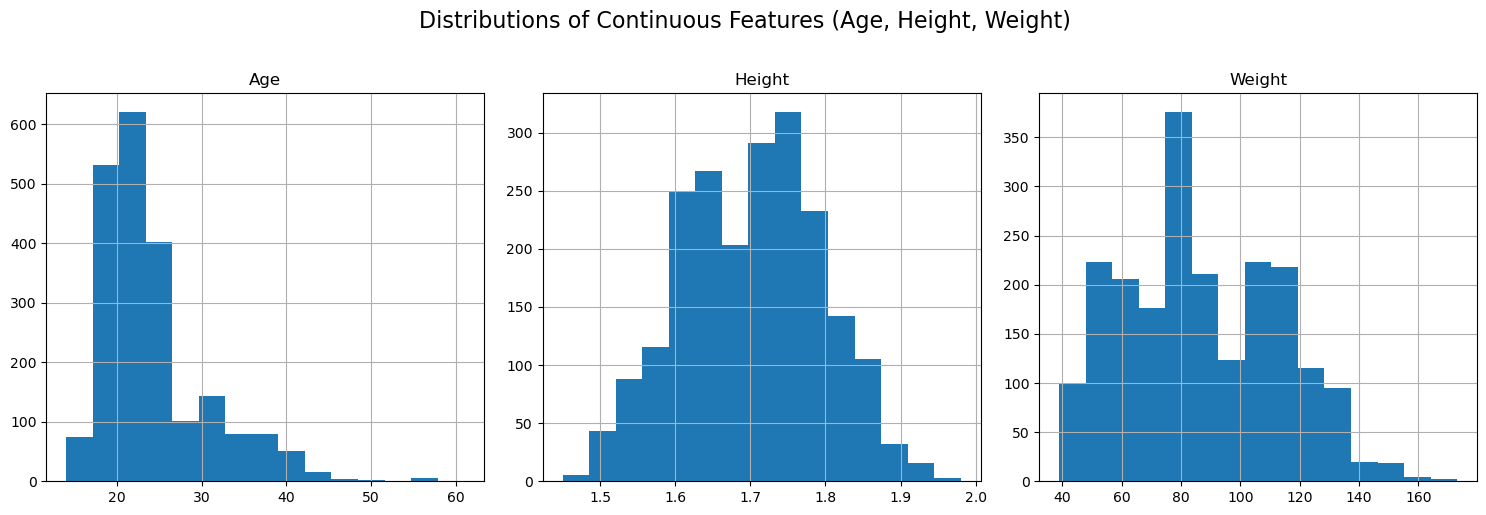

In [10]:
# Get plots of continuous columns distributions
ax = obesity_df[['Age', 'Height', 'Weight']].hist(figsize=(15, 5), bins=15, layout=(1, 3))

# Add overall title
plt.suptitle('Distributions of Continuous Features (Age, Height, Weight)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


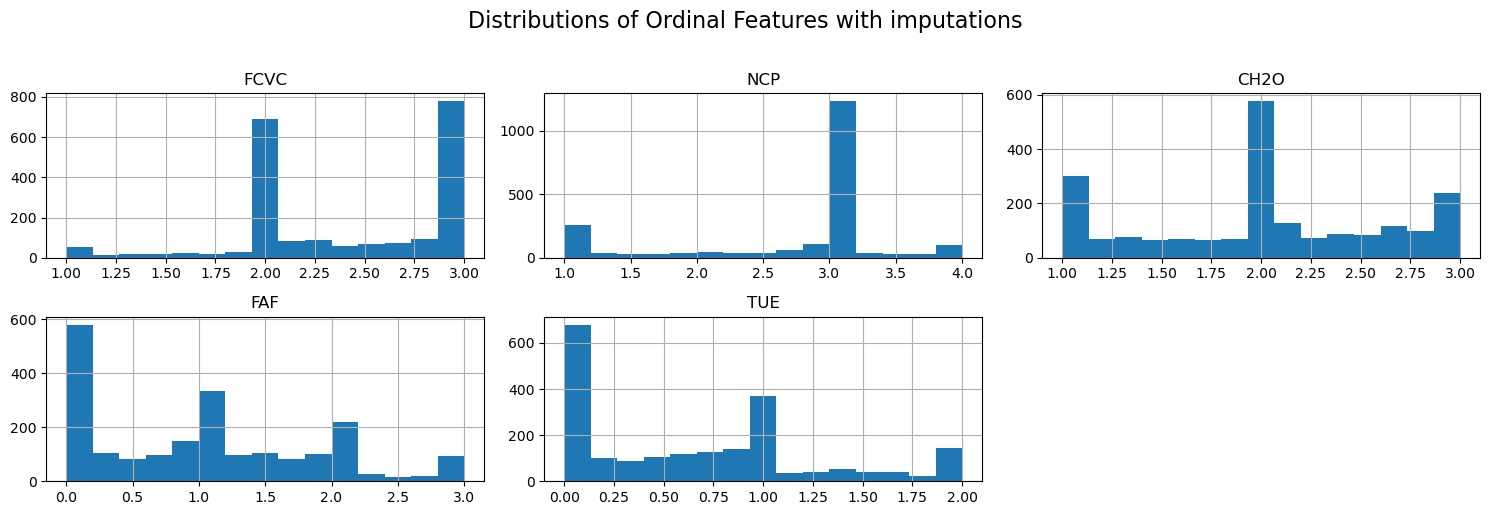

In [11]:
# Get plots of semi-ordinal columns distributions
ax = obesity_df[['FCVC','NCP','CH2O','FAF','TUE']].hist(figsize=(15, 5), bins=15,  layout=(2,3))
# Add overall title
plt.suptitle('Distributions of Ordinal Features with imputations', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

<h3> Notes about numerical variables:</h3>

Age (Years)
- Min: 14.0, Max: 61.0, Mean: 24.3
- Skewed towards early 20s with long tail to 60

Height (Meters)
- Min: 1.45, Max: 1.98, Mean: 1.70
- Close to normal distribution

Weight (Kilograms)
- Min: 39, Max: 173, Mean: 86.6
- Left skewed witha big peak around 80kg

<b>The rest of the numerical variables are a mix of ordinal integers that are encodings of strings, and imputed values mixed in. The integer values are assumed from the dataset paper.</b>


FCVC / "Do you usually eat vegetables with your meals?"
- 1 = Never, 2 = Sometimes, 3 = Always

NCP / "How many main meals do you have daily?"
- Options: Between 1 & 2, Three, More than three
- This one is a little sstrange. The values range from 1 to 4 inclusive, but there are only 3 values from the survey. Maybe the meal number was inferred from the options?

CH20 / "How much water do you drink daily?"
- Options: 1 = Less than a liter, 2 = Between 1 and 2L, 3 = More than 2L
- Mostly 2

FAF / "How often do you have physical activity?" (per week)
- Options: 0 = I do not have, 1 = 1 or 2 days, 2 = 2 or 4 days, 3 = 4 or 5 days
- 0 is highest with a linear drop towards 3

TUE / "How much time do you use technological devices such as cell phone, videogames, television, computer and others?"
- Options: 0 = 0-2 hours, 1 = 3-5 hours, 2 = More than 5 hours
- 0 is highest with a linear drop towards 2

### Bar graphs of strictly categorical variables

Check number of categorical columns

In [12]:
len(cat_cols)

9

Create bar graphs of strictly categorical variables

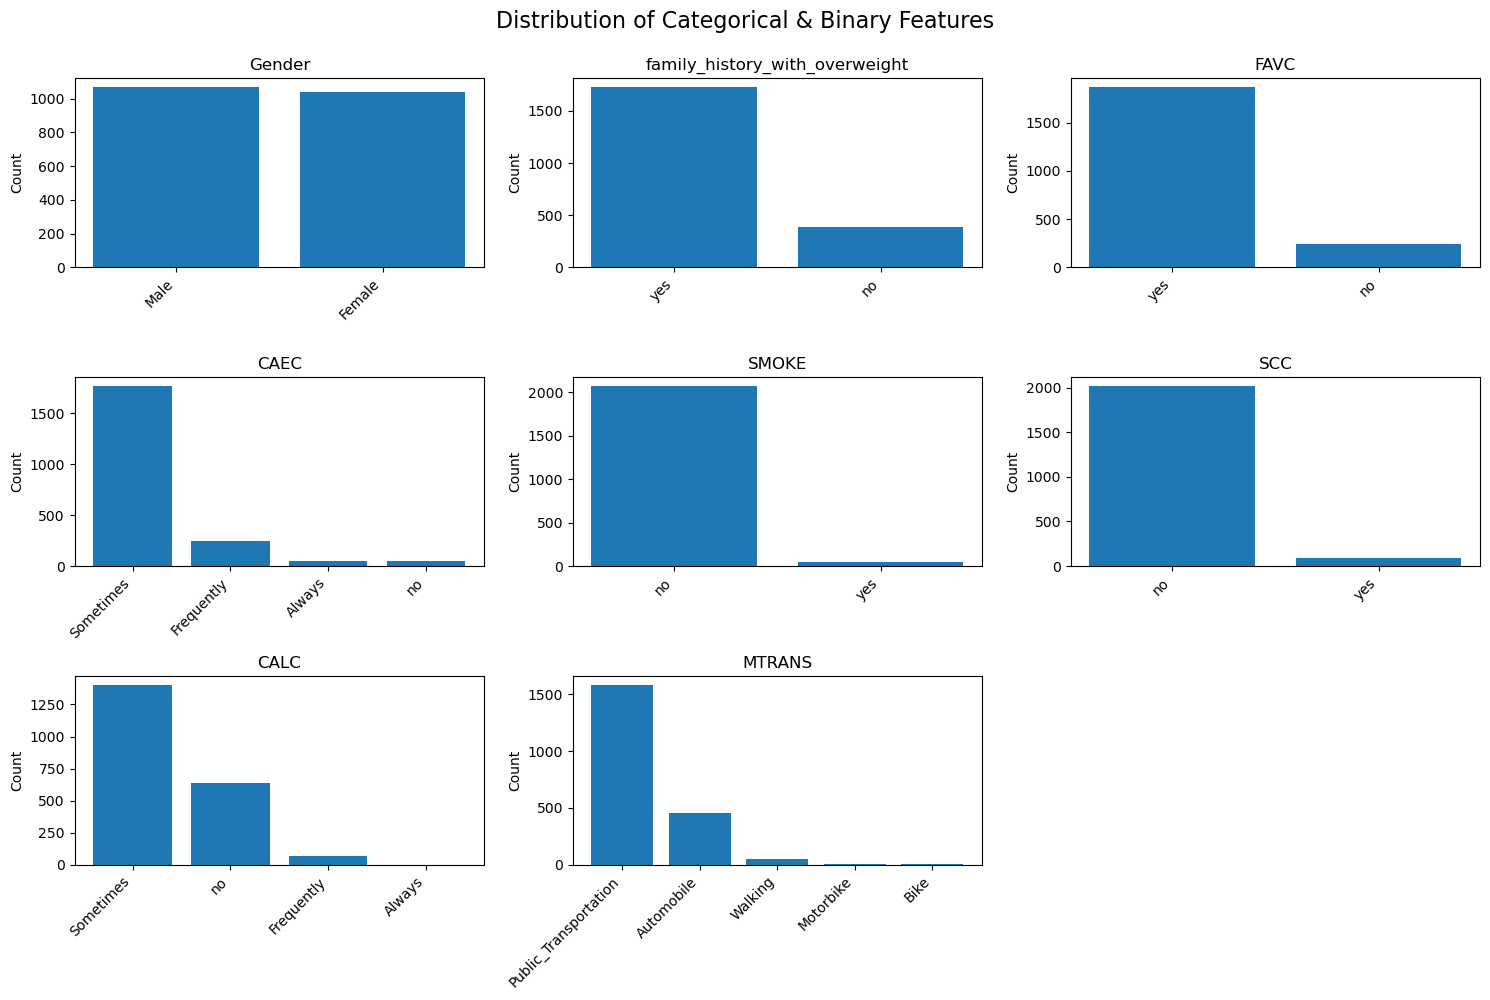

In [13]:
# Remove target from cat_cols
feat_cats = [col for col in cat_cols if col != 'NObeyesdad']

# Make 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot each feature category in subplot
for idx, col in enumerate(feat_cats):
    counts = obesity_df[col].value_counts()
    axes[idx].bar(range(len(counts)), counts.values)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')   # rotate tick labels - looks strange otherwise
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Count')

# Add overall title
fig.suptitle('Distribution of Categorical & Binary Features', fontsize=16, y=0.995)   # move a bit down from top

# hide the empty subplot
axes[8].set_visible(False)

# Tight layout has better spacing?
plt.tight_layout()
plt.show()

### Bar graph for target variable

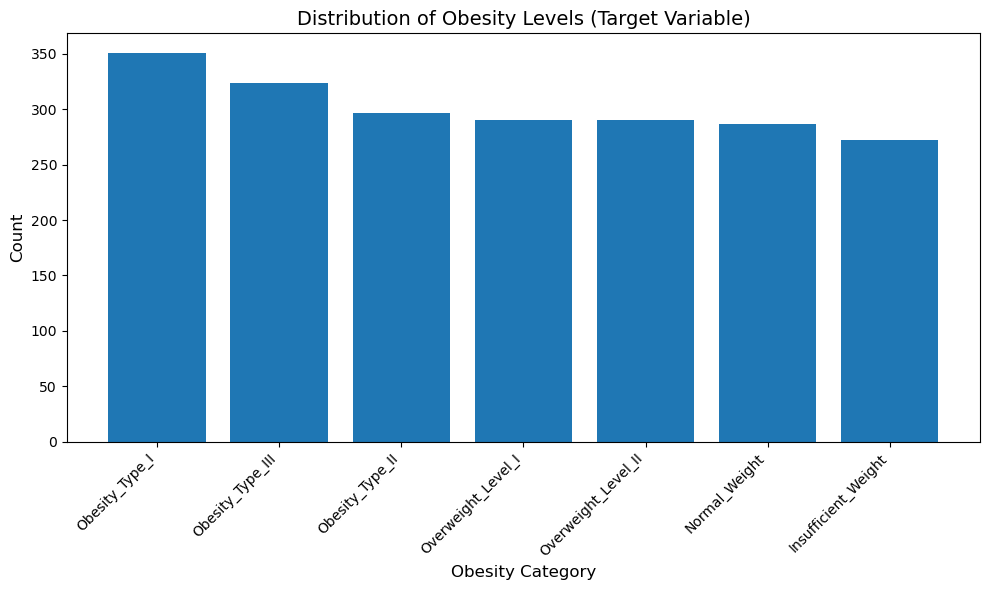

In [14]:
# Target variable on its own - larger for visibility
fig, ax = plt.subplots(figsize=(10, 6))

target_counts = obesity_df['NObeyesdad'].value_counts()
ax.bar(range(len(target_counts)), target_counts.values)
ax.set_xticks(range(len(target_counts)))
ax.set_xticklabels(target_counts.index, rotation=45, ha='right')   # rotate tick labels - looks strange otherwise
ax.set_title('Distribution of Obesity Levels (Target Variable)', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Obesity Category', fontsize=12)

plt.tight_layout()
plt.show()

The obesity types are more heavily featured but classes are generally even otherwise.

### Correlation Analysis

Ordinal categorical variables need to be encoded to look at correlations

In [15]:
# Cpy for correlation analysis
corr_df = obesity_df.copy()

In [16]:
# binary variables encoding
binary_map = {'yes':1, 'no':0}
corr_df['family_history_with_overweight'] = corr_df['family_history_with_overweight'].map(binary_map)
corr_df['FAVC'] = corr_df['FAVC'].map(binary_map)
corr_df['SMOKE'] = corr_df['SMOKE'].map(binary_map)
corr_df['SCC'] = corr_df['SCC'].map(binary_map)

In [17]:
# ordinal frequency variables - unique values check
print("CAEC:", corr_df['CAEC'].unique())
print("CALC:", corr_df['CALC'].unique())
print("NObeyesdad:", corr_df['NObeyesdad'].unique())

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Map from smallest to biggest using 0 to 3 (CAEC and CALC) and 0 to 6 for NObeyesdad

In [18]:
# ordinal frequency variables encoding
corr_df['CAEC'] = corr_df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
corr_df['CALC'] = corr_df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# target variable
corr_df['NObeyesdad'] = corr_df['NObeyesdad'].map({
    'Insufficient_Weight':0,
    'Normal_Weight':1,
    'Overweight_Level_I':2,
    'Overweight_Level_II':3,
    'Obesity_Type_I':4,
    'Obesity_Type_II':5,
    'Obesity_Type_III':6
})

Double check mapping

In [19]:
# Check for mapping issues - should be NANs
print(corr_df[['CAEC', 'CALC', 'NObeyesdad']].isnull().sum())

# Check encoding worked
print(corr_df['CAEC'].value_counts().sort_index())
print(corr_df['CALC'].value_counts().sort_index())
print(corr_df['NObeyesdad'].value_counts().sort_index())

CAEC          0
CALC          0
NObeyesdad    0
dtype: int64
CAEC
0      51
1    1765
2     242
3      53
Name: count, dtype: int64
CALC
0     639
1    1401
2      70
3       1
Name: count, dtype: int64
NObeyesdad
0    272
1    287
2    290
3    290
4    351
5    297
6    324
Name: count, dtype: int64


Double check correlation dataframe.

In [20]:
corr_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Walking,2
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,6


#### Plot correlation matrix

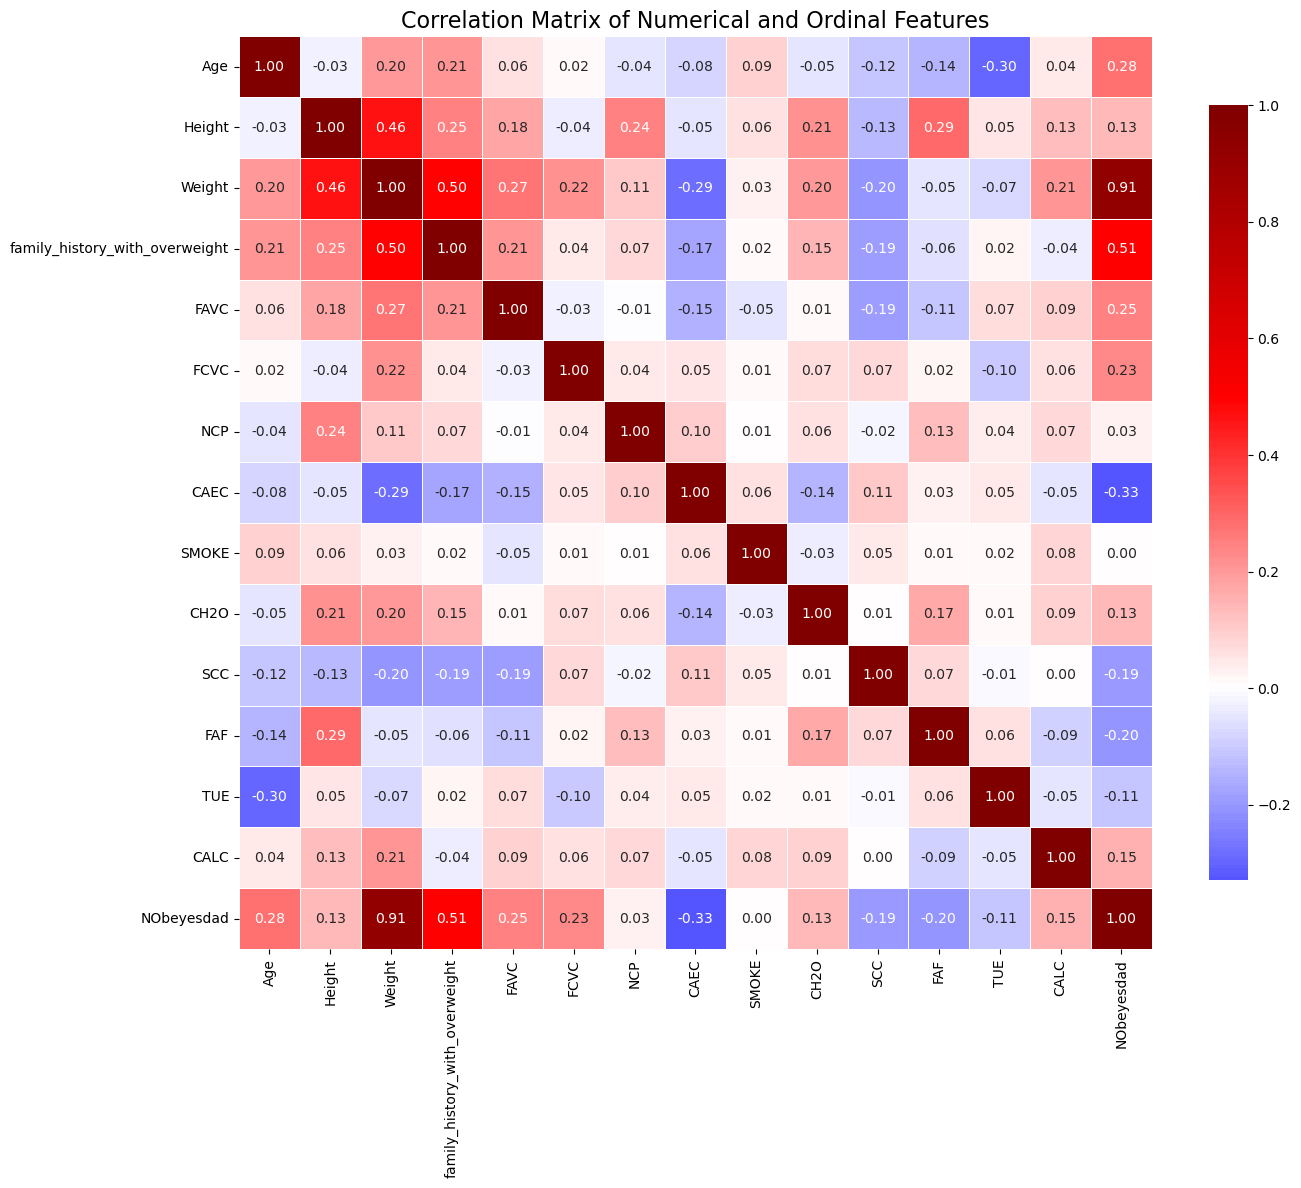

In [21]:
# Select only columns for correlation
#  - exclude Gender and MTRANS as nominal
corr_cols = [c for c in corr_df.columns if c not in ['Gender', 'MTRANS']]
correlation_matrix = corr_df[corr_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,   # show correlation values
            fmt='.2f',   # 2 decimal places
            cmap='seismic',   # colour scheme, prefer seismic
            center=0,   # centre colormap at 0
            square=True,  # square cells
            linewidths=0.5,   # add a bit of whitespace
            cbar_kws={"shrink": 0.8})   # shrink the colour bar a bit

plt.title('Correlation Matrix of Numerical and Ordinal Features', fontsize=16)
plt.tight_layout()
plt.show()

### Cross Tabulations with Obesity Classification

Review cross-tabulations of obesity versus categorical features. Might show interesting weights just between those categorical variables.

ALWAYS normalise on index, ie the different classes of the feature variable

OB1 = Obesity Type 1 and OW1 = Overweight Level 1 for reference

#### Gender

In [22]:
pd.crosstab(obesity_df['Gender'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,0.165868,0.135187,0.149569,0.001918,0.309684,0.139022,0.098754
Male,0.092697,0.136704,0.182584,0.276217,0.000936,0.135768,0.175094


OB2 is heavily skewed to males, but OB3 is skewed to females?

#### "Family history of obesity?"

In [23]:
pd.crosstab(obesity_df['family_history_with_overweight'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,0.379221,0.342857,0.018182,0.002597,0.000000,0.210390,0.046753
yes,0.073001,0.089803,0.199305,0.171495,0.187717,0.121089,0.157590


Looks like fairly big factor. No family history has ~70% in insuffiecient or normal weight, compared to ~16%.

#### "Do you eat high caloric food frequently?"

In [24]:
pd.crosstab(obesity_df['FAVC'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,0.208163,0.322449,0.044898,0.028571,0.004082,0.089796,0.302041
yes,0.118435,0.111468,0.182208,0.155413,0.173098,0.143623,0.115756


Generally no high calorie is insufficient or normal weight. Oddly ~30% of no high calory in OW2?

#### "Do you eat any food between meals?"

In [25]:
pd.crosstab(obesity_df['CAEC'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,0.037736,0.660377,0.113208,0.037736,0.000000,0.094340,0.056604
Frequently,0.500000,0.342975,0.024793,0.004132,0.004132,0.057851,0.066116
Sometimes,0.082720,0.090085,0.191501,0.166006,0.183003,0.133711,0.152975
no,0.058824,0.196078,0.019608,0.019608,0.000000,0.686275,0.019608


Some confounding variable? ~66% of always eating between meals normal weight??? Grazing habits maybe?

Also ~68% of no eating between meals OW1? So not snacking, but massive meals?

Need more info to explain both.

#### "Do you smoke?"

In [26]:
pd.crosstab(obesity_df['SMOKE'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,0.131108,0.132559,0.166909,0.136430,0.156265,0.138849,0.137881
yes,0.022727,0.295455,0.136364,0.340909,0.022727,0.068182,0.113636


Around 30% of smokers normal weight. But also ~34% in OB2?

Fairly even across board for non-smokers

#### "Do you monitor the calories you eat daily?"

In [27]:
pd.crosstab(obesity_df['SCC'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,0.124069,0.127543,0.173201,0.146898,0.160794,0.125558,0.141935
yes,0.229167,0.312500,0.020833,0.010417,0.000000,0.385417,0.041667


Most calorie trackers (~93%) are insufficient, normal weight, or OW1.

#### "How often do you drink alcohol?"

In [28]:
pd.crosstab(obesity_df['CALC'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Frequently,0.014286,0.257143,0.200000,0.028571,0.000000,0.228571,0.271429
Sometimes,0.109921,0.114918,0.122769,0.159886,0.230550,0.159886,0.102070
no,0.183099,0.167449,0.258216,0.111111,0.001565,0.078247,0.200313


Nothing really standing out with alcohol consumption.

#### "Which transportation do you usually use?"

In [29]:
pd.crosstab(obesity_df['MTRANS'],
            obesity_df['NObeyesdad'],
            normalize='index')

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,0.100656,0.098468,0.240700,0.207877,0.002188,0.144420,0.205689
Bike,0.000000,0.571429,0.000000,0.142857,0.000000,0.285714,0.000000
Motorbike,0.000000,0.545455,0.272727,0.000000,0.000000,0.090909,0.090909
Public_Transportation,0.139241,0.126582,0.149367,0.126582,0.204430,0.134177,0.119620
Walking,0.107143,0.571429,0.035714,0.017857,0.000000,0.160714,0.107143


More than 50% of bike, moterbike, and walking persons are normal weight. Public transport and automobile have higher obesity levels.

!!! Be careful of a low sampling of motorbikes, bikes, and motorbikes. !!!

### Box plots of numerical cols

Set split of continuous types, x-axis labels, order, and colour maping.

Keep it to strictly numerical columns. The mixed ordinal and continuous variables don't come out well.

In [30]:
# only true continuous variables
continuous_cols = ['Age', 'Height', 'Weight']

# order and create mapping
obesity_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Short labels
short_labels = ['IW', 'NW', 'OW1', 'OW2', 'OB1', 'OB2', 'OB3']

# Create a colour palette as a dict mapped to obesity levels
colours = sns.color_palette("RdYlGn_r", n_colors=len(obesity_order))   # red > yellow > green reversed
colour_dict = dict(zip(obesity_order, colours))

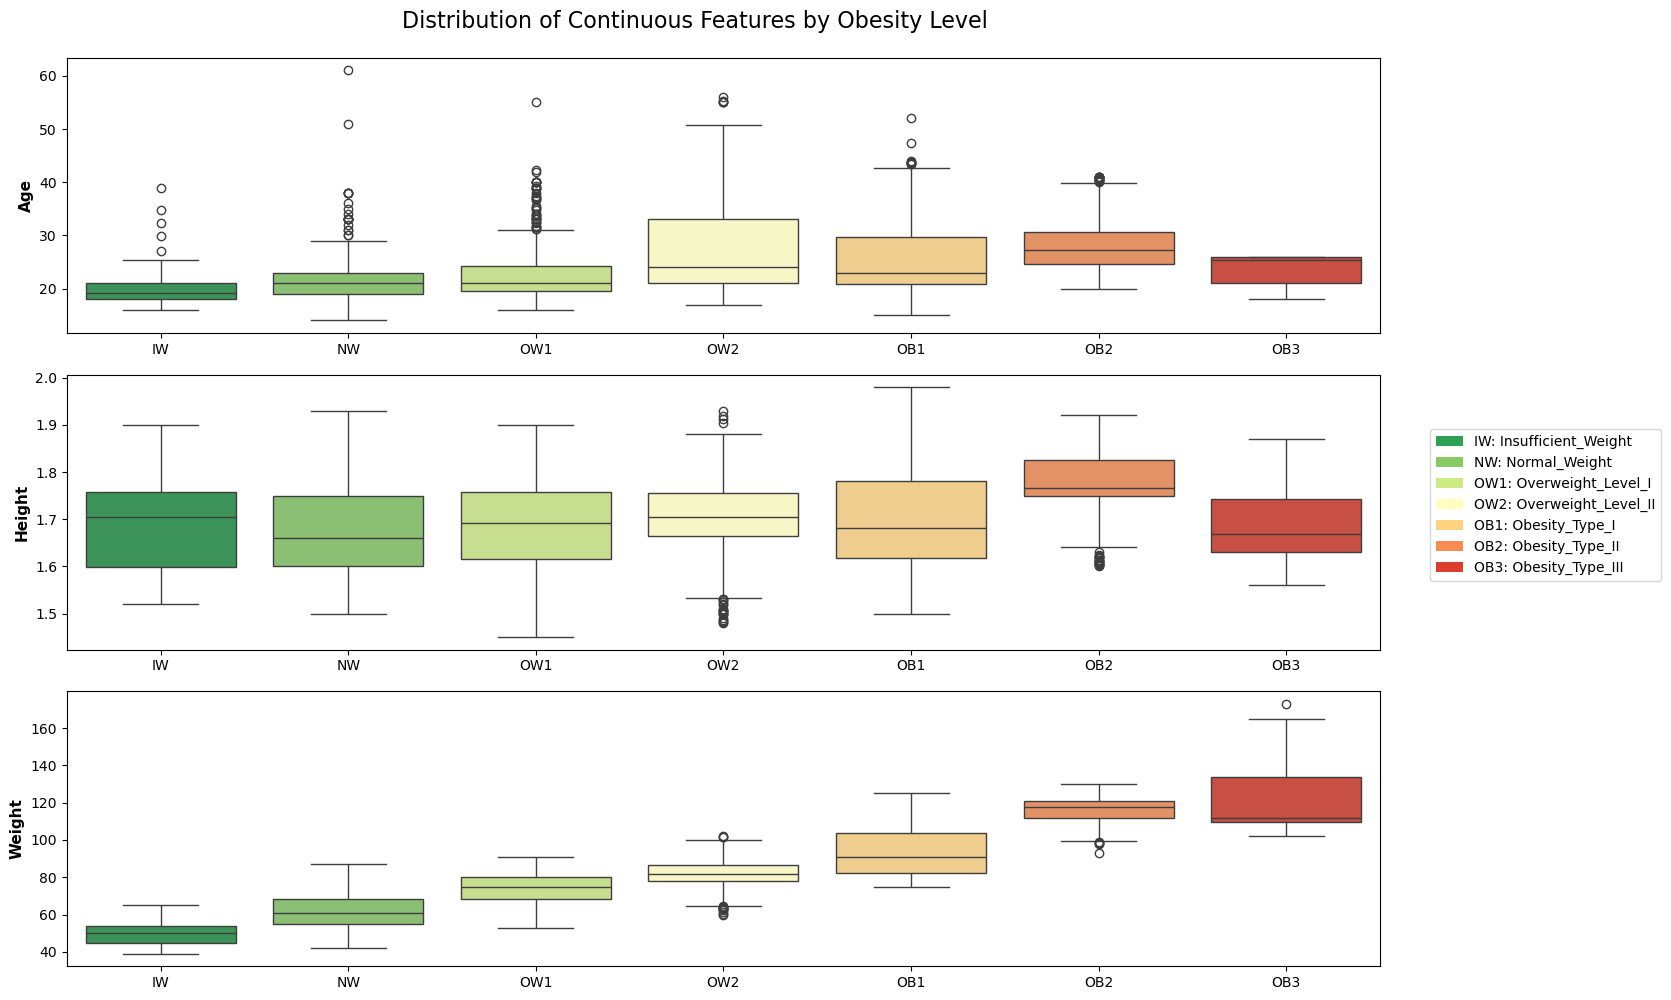

In [31]:
# Create a vertical stack of subplots
fig, axes = plt.subplots(3 , 1, figsize=(14, 10))

for idx, col in enumerate(continuous_cols):
    sns.boxplot(data=obesity_df,
                x='NObeyesdad',
                y=col,
                order=obesity_order,
                hue='NObeyesdad',
                hue_order=obesity_order,
                palette=colour_dict,
                legend=False,
                ax=axes[idx])

    axes[idx].set_ylabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_xticks(range(len(short_labels)))
    axes[idx].set_xticklabels(short_labels)

# Make a better legend
from matplotlib.patches import Patch
# elements is a list of Line2D objects
legend_elements = [Patch(facecolor=colours[i], label=f'{short_labels[i]}: {obesity_order[i]}')  # connect colours, short labels, and obesity levels
                   for i in range(len(obesity_order))]    # for each obesity value

# Add legend to figure
fig.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1.02, 0.5),   # place legend apart to right of plt
           fontsize=10,
           frameon=True)

fig.suptitle('Distribution of Continuous Features by Obesity Level', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

- Obesity level classifcation seems to rise with Age, although there are many outliers above max in IW, NW, and OW1
- OB2 has more height, but many outliers underneath minimum
- Trend follows as expected with weight. More weight, higher obesity classification.

## Unsupervised Learning

### Unsupervised Learning Imports

In [32]:
# Preprocessing, clustering, and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# PCA
from sklearn.decomposition import PCA

### Set feature types

We need to define what types of variables are features are so we can transform them correctly for the distance algorithms

In [33]:
# Define feature groups based on data types
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
binary_features = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_features = ['CAEC', 'CALC']
nominal_features = ['Gender', 'MTRANS']

In [34]:
# Check for 16 features
len(numerical_features) + len(binary_features) + len(ordinal_features) + len(nominal_features)

16

### Encodings

We need to encode the variables so they can be defined in a vector space for a distance algorithm such as K-means

In [35]:
# work on copy
encoded_df = obesity_df.copy()

#### Binary Features

In [36]:
binary_map = {'yes':1, 'no':0}

for col in binary_features:
    encoded_df[col] = encoded_df[col].map(binary_map).astype(int)

In [37]:
encoded_df[binary_features]

,family_history_with_overweight,FAVC,SMOKE,SCC
0,1,0,0,0
1,1,0,1,1
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2106,1,1,0,0
2107,1,1,0,0
2108,1,1,0,0
2109,1,1,0,0


#### Ordinal Features

For the two ordinal features

no < sometimes < frequently < always -> 0, 1, 2, 3

In [38]:
ordinal_map = {
    'no':0,
    'Sometimes':1,
    'Frequently':2,
    'Always':3
}

for col in ordinal_features:
    encoded_df[col] = encoded_df[col].map(ordinal_map)

In [39]:
encoded_df[ordinal_features]

,CAEC,CALC
0,1,0
1,1,1
2,1,2
3,1,2
4,1,1
...,...,...
2106,1,1
2107,1,1
2108,1,1
2109,1,1


#### Nominal Features - One Hot Encoding

Use one hot encoding for the nominal features and drop first. Absense of any single value implies the dropped value

In [40]:
encoded_df = pd.get_dummies(encoded_df, columns=nominal_features, drop_first=True)

In [41]:
# check columns, should have 1 (2-1) for gender and 4 (5-1) for MTRANS
encoded_df.columns.to_list()

['Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'NObeyesdad',
 'Gender_Male',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

### Create and scale feature dataset - a.k.a X

In [42]:
# Get all feature columns except NObeyesdad
feature_cols = [col for col in encoded_df.columns if col != 'NObeyesdad']

len(feature_cols) # should be 19

19

In [43]:
# Only feature cols go into X
X = encoded_df[feature_cols]

In [44]:
# Scale all features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep track of feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

In [45]:
# check shape
X_scaled_df.shape

(2111, 19)

In [46]:
X_scaled_df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,-1.011914,-0.05768,-0.072375,0.579721,-0.165078
1,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,-1.011914,-0.05768,-0.072375,0.579721,-0.165078
2,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,0.988227,-0.05768,-0.072375,0.579721,-0.165078
3,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,0.988227,-0.05768,-0.072375,-1.724969,6.057758
4,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,0.988227,-0.05768,-0.072375,0.579721,-0.165078


In [47]:
# Check scaling has been correct. Mean of 0 and sd of 1
X_scaled_df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2111.000000
mean,0.000000,-5.385449e-16,-5.385449e-16,-8.078174e-17,1.346362e-16,-1.346362e-17,4.964711e-16,-1.884907e-16,-2.019544e-17,1.077090e-16,-6.731812e-17,2.692725e-17,-1.346362e-17,5.048859e-17,-5.385449e-17,-1.009772e-17,2.019544e-17,6.731812e-17,0.000000
std,1.000237,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237
min,-1.625448,-2.698006e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-2.435125e+00,-1.459003e-01,-1.644905e+00,-2.182720e-01,-1.188039e+00,-1.080625e+00,-1.419172e+00,-1.011914e+00,-5.768012e-02,-7.237469e-02,-1.724969e+00,-0.165078
25%,-0.688066,-7.683883e-01,-8.062914e-01,4.722913e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,-3.003456e-01,-1.459003e-01,-6.905894e-01,-2.182720e-01,-1.041630e+00,-1.080625e+00,-1.419172e+00,-1.011914e+00,-5.768012e-02,-7.237469e-02,-1.724969e+00,-0.165078
50%,-0.241897,-1.263207e-02,-1.369510e-01,4.722913e-01,3.623491e-01,-6.283450e-02,4.041527e-01,-3.003456e-01,-1.459003e-01,-1.307326e-02,-2.182720e-01,-1.210937e-02,-5.341135e-02,5.211595e-01,9.882266e-01,-5.768012e-02,-7.237469e-02,5.797206e-01,-0.165078
75%,0.265964,7.159595e-01,7.960531e-01,4.722913e-01,3.623491e-01,1.088342e+00,4.041527e-01,-3.003456e-01,-1.459003e-01,7.659959e-01,-2.182720e-01,7.718565e-01,5.619968e-01,5.211595e-01,9.882266e-01,-5.768012e-02,-7.237469e-02,5.797206e-01,-0.165078
max,5.782584,2.983646e+00,3.300136e+00,4.722913e-01,3.623491e-01,1.088342e+00,1.689740e+00,3.969213e+00,6.853997e+00,1.618759e+00,4.581439e+00,2.339750e+00,2.204618e+00,4.401822e+00,9.882266e-01,1.733700e+01,1.381699e+01,5.797206e-01,6.057758


### K-Means

#### Algorithm Training

Start the k-means algorithm training.

We'll test k from 2 to 10. We know given classes are 7.

In [48]:
# Set score storage and k numbers
inertias = []
silhouette_scores = []
homogeneity_scores = []
completeness_scores = []
k_range = range(2,11)

In [49]:
# Run k means and save results
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=13, random_state=13) # unlucky for some
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    homogeneity_scores.append(homogeneity_score(encoded_df['NObeyesdad'], labels))
    completeness_scores.append(completeness_score(encoded_df['NObeyesdad'], labels))

In [50]:
# put results in dataframe
results_df = pd.DataFrame({
    'k': k_range,
    'Inertia': inertias,
    'Silhouette': silhouette_scores,
    'Homogeneity': homogeneity_scores,
    'Completeness': completeness_scores
})

#### K-Means Results

Lets look at the results

In [51]:
results_df

,k,Inertia,Silhouette,Homogeneity,Completeness
0,2,36322.612643,0.211775,0.129112,0.428288
1,3,33765.239858,0.140294,0.140177,0.261060
2,4,31542.890068,0.143382,0.151917,0.259176
3,5,29681.758384,0.098845,0.263896,0.355983
4,6,27533.878825,0.110885,0.264125,0.351749
5,7,25847.454858,0.129723,0.278539,0.341662
6,8,24055.861013,0.116954,0.273889,0.387262
7,9,21872.279760,0.150242,0.279522,0.327811
8,10,20748.433927,0.157624,0.329357,0.341589


A bit noisy to look at. Plotting would be better

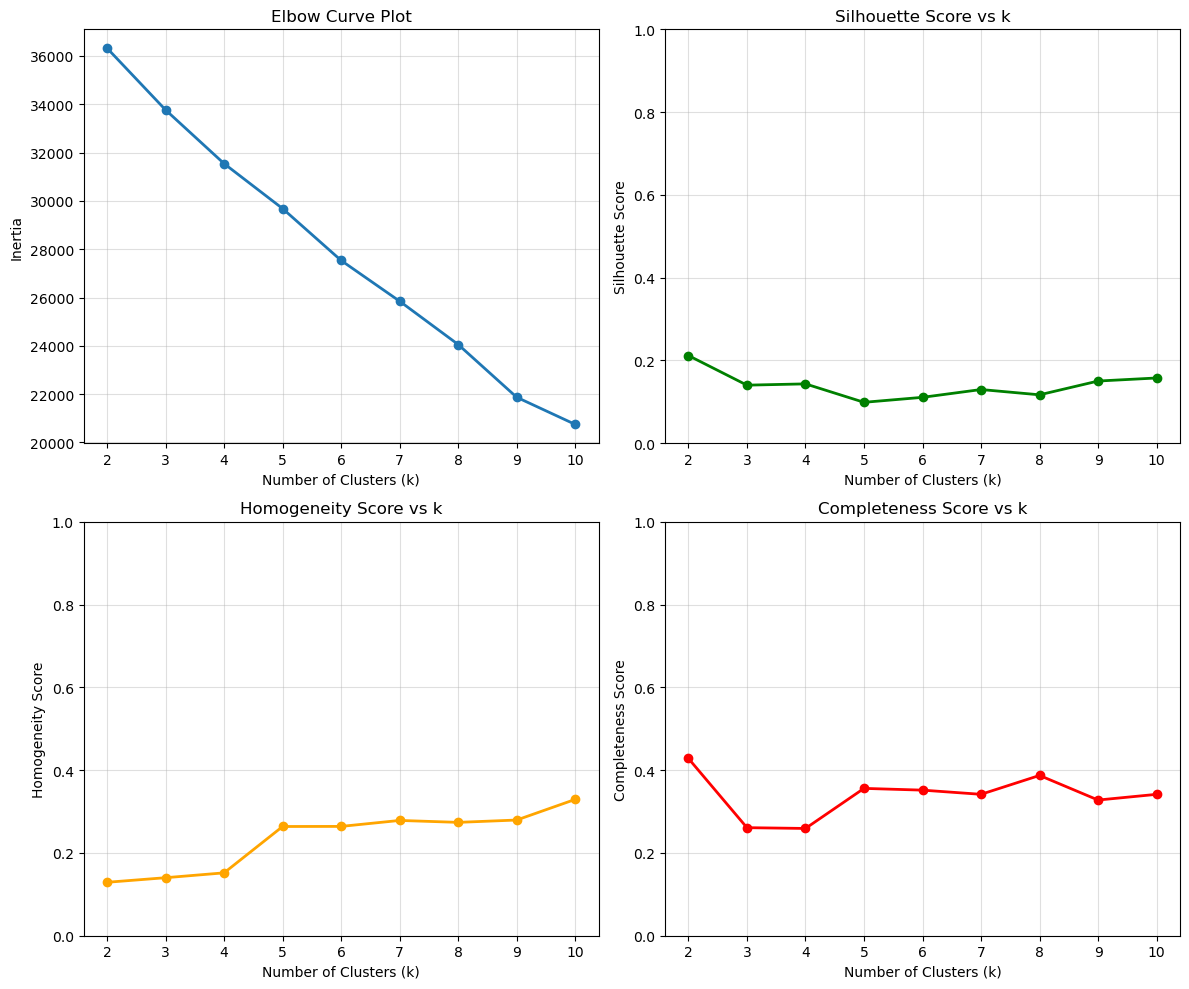

In [52]:
# Create subplots for the metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))   # check figsize, might need to be bigger

# Elbow plot (Inertia)
axes[0, 0].plot(results_df['k'], results_df['Inertia'], marker='o', linewidth=2)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Curve Plot')
axes[0, 0].grid(True, alpha=0.4)

# Silhouette Score
axes[0, 1].plot(results_df['k'], results_df['Silhouette'], marker='o', color='green', linewidth=2)
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs k')
axes[0, 1].grid(True, alpha=0.4)
axes[0, 1].set_ylim([0, 1])   # set y 0-1

# Homogeneity Score
axes[1, 0].plot(results_df['k'], results_df['Homogeneity'], marker='o', color='orange', linewidth=2)
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Homogeneity Score')
axes[1, 0].set_title('Homogeneity Score vs k')
axes[1, 0].grid(True, alpha=0.4)
axes[1, 0].set_ylim([0, 1])   # set y 0-1

# Completeness Score
axes[1, 1].plot(results_df['k'], results_df['Completeness'], marker='o', color='red', linewidth=2)
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Completeness Score')
axes[1, 1].set_title('Completeness Score vs k')
axes[1, 1].grid(True, alpha=0.4)
axes[1, 1].set_ylim([0, 1])   # set y 0-1

plt.tight_layout()
plt.show()

There's no clear elbow, at least up to k = 10, it's just a linear line down.
There are some peaks and values across the other scoring metrics. Nothing particularly around 7 and they all have fairly low scores. Below 0.25 for the silhouette score, and 0.4 for homogeneity and completeness

### Just K=7 K-Means?

Try fitting to the number of clusters we know we're aiming for. The 7 obesity classifications

In [53]:
# Fit K-means with k=7 match target class numbers
kmeans_final = KMeans(n_clusters=7, n_init=13, random_state=13)   # unlucky for some
kmeans_final.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_

Check spread of cluster labels

In [54]:
# add cluster labels to encoded df to count them
encoded_df['Cluster'] = cluster_labels
encoded_df['Cluster'].value_counts().sort_index()

Cluster
0    374
1    713
2    400
3     88
4     11
5     61
6    464
Name: count, dtype: int64

Get metrics for k = 7

In [55]:
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels)}")
print(f"Homogeneity Score: {homogeneity_score(encoded_df['NObeyesdad'], cluster_labels)}")
print(f"Completeness Score: {completeness_score(encoded_df['NObeyesdad'], cluster_labels)}")

Silhouette Score: 0.12972251980254093
Homogeneity Score: 0.2785394521189178
Completeness Score: 0.341662290155296


The results aren't exactly promising.

We have 4 fairly well populated clusters that have pulled massively from the other 3. Cluster 4 only has 11 people.

Try using PCA to reduce the dimensionality and understand where the variance is coming from?

### Principal Component Analysis (PCA)

Apply PCA to full dataset to try and understand where variability is coming from

In [56]:
# Apply PCA to see variance explained
pca_full = PCA(random_state=13)
pca_full.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

Get the variances and put them in a dataframe

In [57]:
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Variance_Explained': explained_variance,
    'Cumulative_Variance': cumulative_variance
})

In [58]:
variance_df

,Component,Variance_Explained,Cumulative_Variance
0,1,0.136201,0.136201
1,2,0.095966,0.232167
2,3,0.092325,0.324492
3,4,0.072273,0.396765
4,5,0.060258,0.457024
5,6,0.057689,0.514713
6,7,0.054991,0.569704
7,8,0.052554,0.622258
8,9,0.051189,0.673447
9,10,0.048055,0.721501


Variance explained by first 2 components is ~23%, by first 3 is ~32%. Takes 6 components to explain more than 50% of the variability.

Nothing exceptional.

Plot out scree plot and cumulative variance

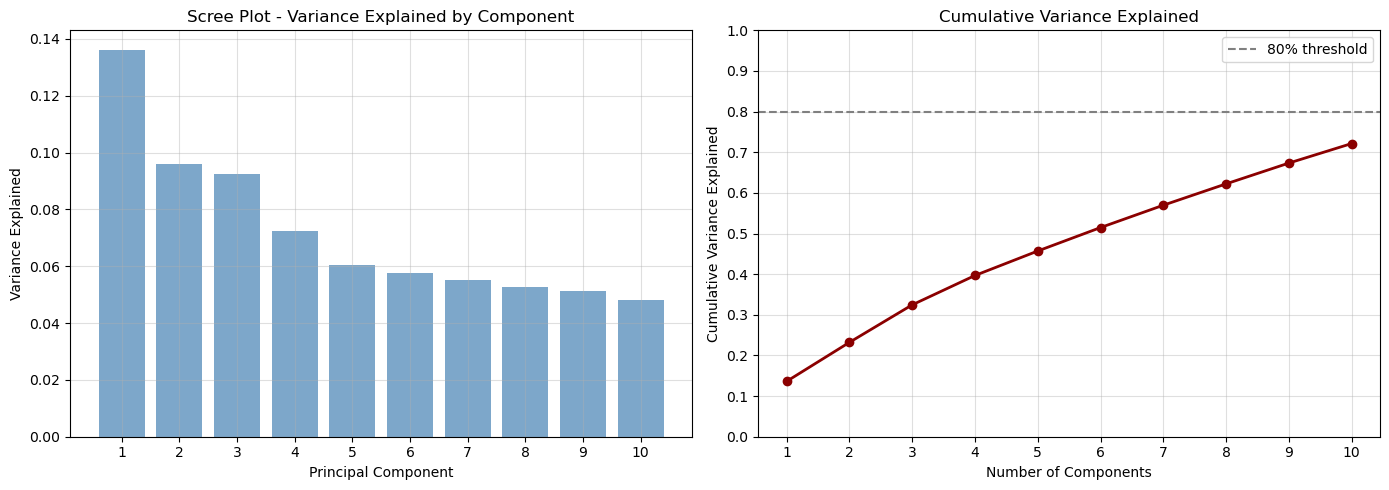

In [59]:
# 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, 11), explained_variance[:10], alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Scree Plot - Variance Explained by Component')
axes[0].set_xticks(range(1, 11))
axes[0].grid(True, alpha=0.4)

# Cumulative variance plot
axes[1].plot(range(1, 11), cumulative_variance[:10], marker='o', linewidth=2, color='darkred')
axes[1].axhline(y=0.8, color='gray', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_title('Cumulative Variance Explained')
axes[1].set_xticks(range(1, 11))
axes[1].set_yticks(np.arange(0.0, 1.01, 0.1))   # full range plot
axes[1].legend()   # add legend for threshold explanation
axes[1].grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

#### Fit PCA with 3 components and try and plot with K-Means labels?

I doubt if 32% variance explained would be enough to make a 3d plot readable or not but lets try. I can always do a heatmap of components breakdown if that doesn't work

In [60]:
# Fit PCA with 3 components
pca_3d = PCA(n_components=3, random_state=13)
X_pca_3d = pca_3d.fit_transform(X_scaled)

In [61]:
# Need encoder for true classes as numbers for colouring
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

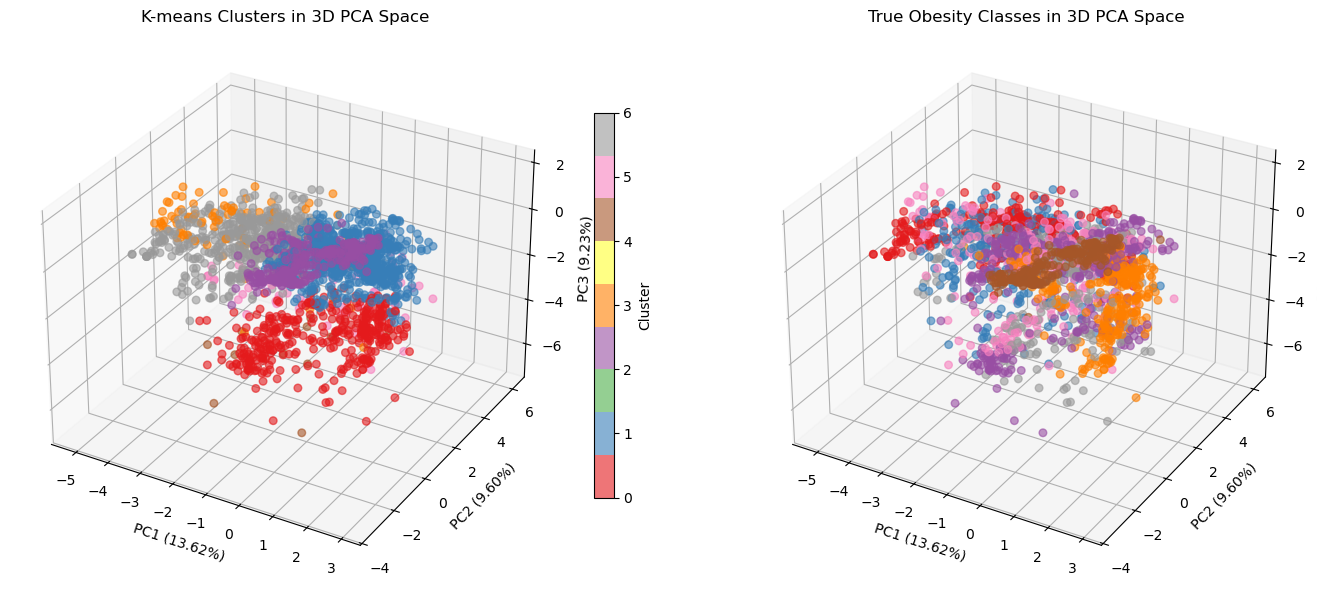

In [62]:
# Two 3D plots side by side
fig = plt.figure(figsize=(14, 6))

# K-means clusters with 3 PCA components
ax1 = fig.add_subplot(121, projection='3d')   # row 1, col 2, subplot 1, in 3d
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=cluster_labels,   # use cluster labels from kmeans
                       cmap='Set1', alpha=0.6, s=30)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')   # round to 2 decimal places
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax1.set_title('K-means Clusters in 3D PCA Space')
plt.colorbar(scatter1, ax=ax1, label='Cluster', shrink=0.7)

# True classes plot with 3 PCA components
ax2 = fig.add_subplot(122, projection='3d')   # row 1, col 2, subplot 2, in 3d

true_labels_encoded = le.fit_transform(encoded_df['NObeyesdad'])   # encode true labels
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=true_labels_encoded,   # use encoded true labels
                       cmap='Set1', alpha=0.6, s=30)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')   # round to 2 decimal places
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax2.set_title('True Obesity Classes in 3D PCA Space')

plt.tight_layout()
plt.show()

This might help explain why K-Means struggled so much. The class overlap in the true classes plot is a huge mess, almost unreadable. Whereas things look a bit more defined (but we know wrong) in the K-means clusters

#### PCA component loading heatmap

It might be better to get an idea of the composition of principal components.

In [63]:
# Get component loadings and put into dataframe
components_df = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_cols
)

In [64]:
components_df

,PC1,PC2,PC3
Age,0.186540,-0.349972,-0.502741
Height,0.458260,0.351639,0.009667
Weight,0.477421,-0.174465,0.137568
family_history_with_overweight,0.378469,-0.173721,0.046827
FAVC,0.258421,-0.205256,0.194520
FCVC,0.002403,-0.167112,0.092051
NCP,0.138178,0.220307,0.003216
CAEC,-0.227502,0.186041,-0.099615
SMOKE,0.028763,0.030856,-0.108325
CH2O,0.212132,0.147162,0.123154


Create a heatmap of the loadings of the components for better visuals

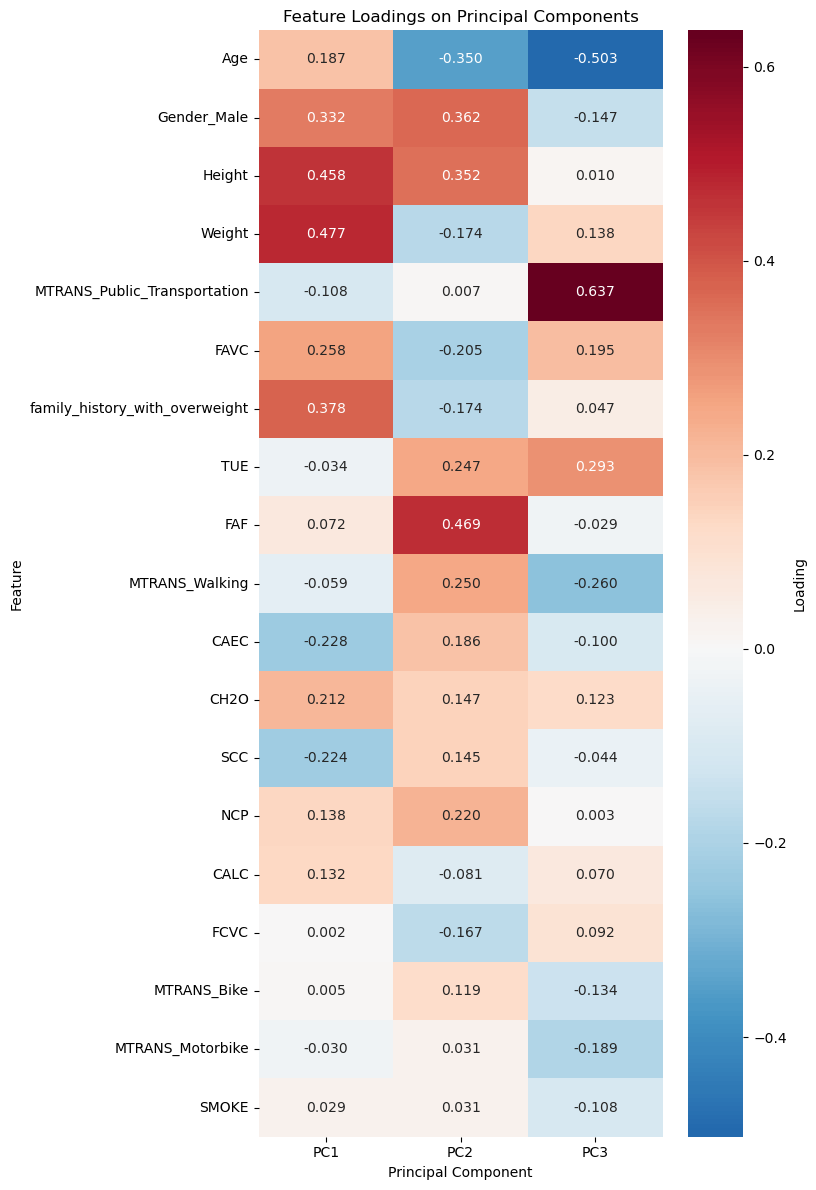

In [65]:
# Create heatmap of component loadings
fig, ax = plt.subplots(figsize=(8, 12))

# Arrange sorted features by total contributions
sorted_features = components_df.abs().sum(axis=1).sort_values(ascending=False).index
loadings_subset = components_df.loc[sorted_features, ['PC1', 'PC2', 'PC3']]

sns.heatmap(loadings_subset,
            annot=True,
            fmt='.3f',   # 3 decimal places look better
            cmap='RdBu_r',   # best looking colours
            center=0,   # centre at 0
            cbar_kws={'label': 'Loading'},   # label for colour bar
            ax=ax)

ax.set_title('Feature Loadings on Principal Components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()

PC1 = Phyiscal properties and genetics/living enviroment

PC2 = Physical activity, phyiscal properties but minus age

PC3 = Use of public transport, inverse age and screen time

## Supervised Learning

Let's see if it's possible to train a machine learning model to predict which class a person is based on the given features

### Initial imports

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

# Set random seed if needed
np.random.seed(13)    # unlucky for some

### Data Preperation

Set up the ordinal target mapping, and then the reverse so things can be visualised properly later

In [67]:
# Ordinal target mapping for 7 obesity levels
obesity_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# encoded target y
y = obesity_df['NObeyesdad'].map(obesity_map)

# reverse mapping for later visualisation. Swap k and v pairs.
reverse_map = {v: k for k, v in obesity_map.items()}

In [68]:
# Separate features from target
X = obesity_df.drop('NObeyesdad', axis=1)

#### Train Test Split Stratified

In [69]:
# Stratified train/test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=13,    # unlucky for some
    stratify=y   # keeps classes even
)

#### Feature encoding

Rather than do all individual cells again, do it all as a function?

In [70]:
# define groups
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
binary_features = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_features = ['CAEC', 'CALC']
nominal_features = ['Gender', 'MTRANS']

In [71]:
# function to encode features
def encode_features(df):
    """Apply encoding to feature dataframe"""
    df_enc = df.copy()

    # binary = yes/no -> 1/0
    for col in binary_features:
        df_enc[col] = (df_enc[col] == 'yes').astype(int)

    # ordinal =  map to 0/1/2/3
    ordinal_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    for col in ordinal_features:
        df_enc[col] = df_enc[col].map(ordinal_mapping)

    # nominal = one-hot encode (drop_first=True)
    df_enc = pd.get_dummies(df_enc, columns=nominal_features, drop_first=True)

    return df_enc

In [72]:
# apply encoding to train and test
X_train_enc = encode_features(X_train)
X_test_enc = encode_features(X_test)

Check them

In [73]:
X_train_enc

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1063,45.000000,1.675953,79.668320,1,1,2.598051,3.000000,1,0,1.000000,0,0.000000,0.000000,0,False,False,False,False,False
118,23.000000,1.620000,53.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,1,True,False,False,True,False
877,18.000000,1.647971,68.818893,1,1,2.000000,1.411685,1,0,1.859089,0,0.000000,1.306000,0,False,False,False,True,False
480,18.000000,1.570000,50.000000,0,1,2.000000,3.000000,1,0,1.000000,0,0.000000,1.000000,1,False,False,False,True,False
447,19.000000,1.800000,87.000000,1,1,2.000000,4.000000,1,0,2.000000,0,2.000000,1.000000,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,30.475248,1.801368,121.094257,1,1,2.328469,3.000000,1,0,2.001208,0,0.800487,0.176678,1,True,False,False,False,False
541,19.717249,1.688426,49.660995,0,0,2.714447,3.000000,2,0,2.000000,0,1.903182,1.000000,1,False,False,False,True,False
1317,24.184891,1.768834,97.449743,1,1,2.000000,3.000000,1,0,2.973729,0,2.491642,1.365950,0,True,False,False,True,False
1035,17.971574,1.720379,85.000000,1,1,2.000000,3.000000,1,0,2.802498,0,1.000000,0.417580,1,True,False,False,True,False


In [74]:
X_test_enc

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
743,18.381382,1.722547,53.783977,1,1,2.000000,3.131032,1,0,2.072194,0,1.487987,2.000000,1,True,False,False,True,False
280,21.000000,1.750000,62.000000,0,1,3.000000,4.000000,2,1,2.000000,0,0.000000,0.000000,1,True,False,False,True,False
261,28.000000,1.700000,73.000000,1,0,2.000000,3.000000,2,0,2.000000,1,2.000000,0.000000,1,False,False,False,False,True
1983,20.908785,1.700996,126.490236,1,1,3.000000,3.000000,1,0,1.242832,0,0.530925,0.575969,1,False,False,False,True,False
85,23.000000,1.650000,58.500000,1,0,2.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,18.000000,1.750000,85.000000,1,0,2.000000,3.000000,1,0,3.000000,0,1.000000,0.000000,1,True,False,False,True,False
1083,24.122589,1.856759,95.887056,1,1,1.116068,2.449067,1,0,2.000000,0,0.926350,1.971170,1,True,False,False,True,False
967,32.278869,1.646020,74.147443,1,1,2.885178,2.562895,1,0,1.017006,0,0.588673,0.916291,1,False,False,False,False,False
1560,25.300208,1.765258,114.330023,1,1,1.562804,3.000000,1,0,2.075493,0,1.553734,0.000436,1,True,False,False,True,False


#### Scale the features

To stop data leaking we fit and trasnform on the training set and only transform on the test set.

In [75]:
# Set up standard scaler
scaler = StandardScaler()

In [76]:
# Fit and transform on training set, ONLY transform on test set
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [77]:
# convert back to dataframes to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns, index=X_train_enc.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns, index=X_test_enc.index)

In [78]:
print(X_train_scaled.mean().mean())   # should be 0 or very close to it
print(X_train_scaled.std().mean())   # should be 1 or very close to it

8.937300885136249e-17
1.0003160056959908


In [79]:
print(X_test_scaled.mean().mean())   # should be 0 - wont be as near as training set
print(X_test_scaled.std().mean())   # should be 1 - wont be as near as training set

0.010287451224926508
0.9820207470168661


### Logisitic Regression

Logistic regression is promising for ordinal targets. Let's try that first.

#### Training

In [80]:
# Automatically multiclassify with LogisticRegression
log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,   # make sure model converges
    random_state=13,   # unlucky for some
    C=1.0
)

# Train the model
log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",13
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [81]:
# Check convergence
print(log_reg.n_iter_[0])
print(log_reg.classes_)  # should be [0, 1, 2, 3, 4, 5, 6]
print(log_reg.coef_.shape)  # should 7 * 19

70
[0 1 2 3 4 5 6]
(7, 19)


Oh okay. 1000 iters was overkill then. We've got our classes and our coeficients as well.

#### Testing / Performance

In [82]:
# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# get prediction probabilities
y_test_proba = log_reg.predict_proba(X_test_scaled)

# calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [83]:
print(f"Training Accuracy: {train_accuracy*100:.2f}%")   # give as percent
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Difference: {abs(train_accuracy - test_accuracy)*100:.3f}%")

Training Accuracy: 89.83%
Test Accuracy: 87.50%
Difference: 2.329%


2.33% gap between test and training is good. Not much overfitting.

In [84]:
# classification report
target_names = [reverse_map[i] for i in sorted(reverse_map.keys())]   # get class names from reverse map

print(classification_report(y_test, y_test_pred, target_names=target_names, digits=3))

                     precision    recall  f1-score   support

Insufficient_Weight      0.904     0.971     0.936        68
      Normal_Weight      0.855     0.736     0.791        72
 Overweight_Level_I      0.732     0.822     0.774        73
Overweight_Level_II      0.790     0.681     0.731        72
     Obesity_Type_I      0.890     0.920     0.905        88
    Obesity_Type_II      0.936     0.986     0.961        74
   Obesity_Type_III      1.000     0.988     0.994        81

           accuracy                          0.875       528
          macro avg      0.872     0.872     0.870       528
       weighted avg      0.875     0.875     0.873       528



#### Plot confusion matrix

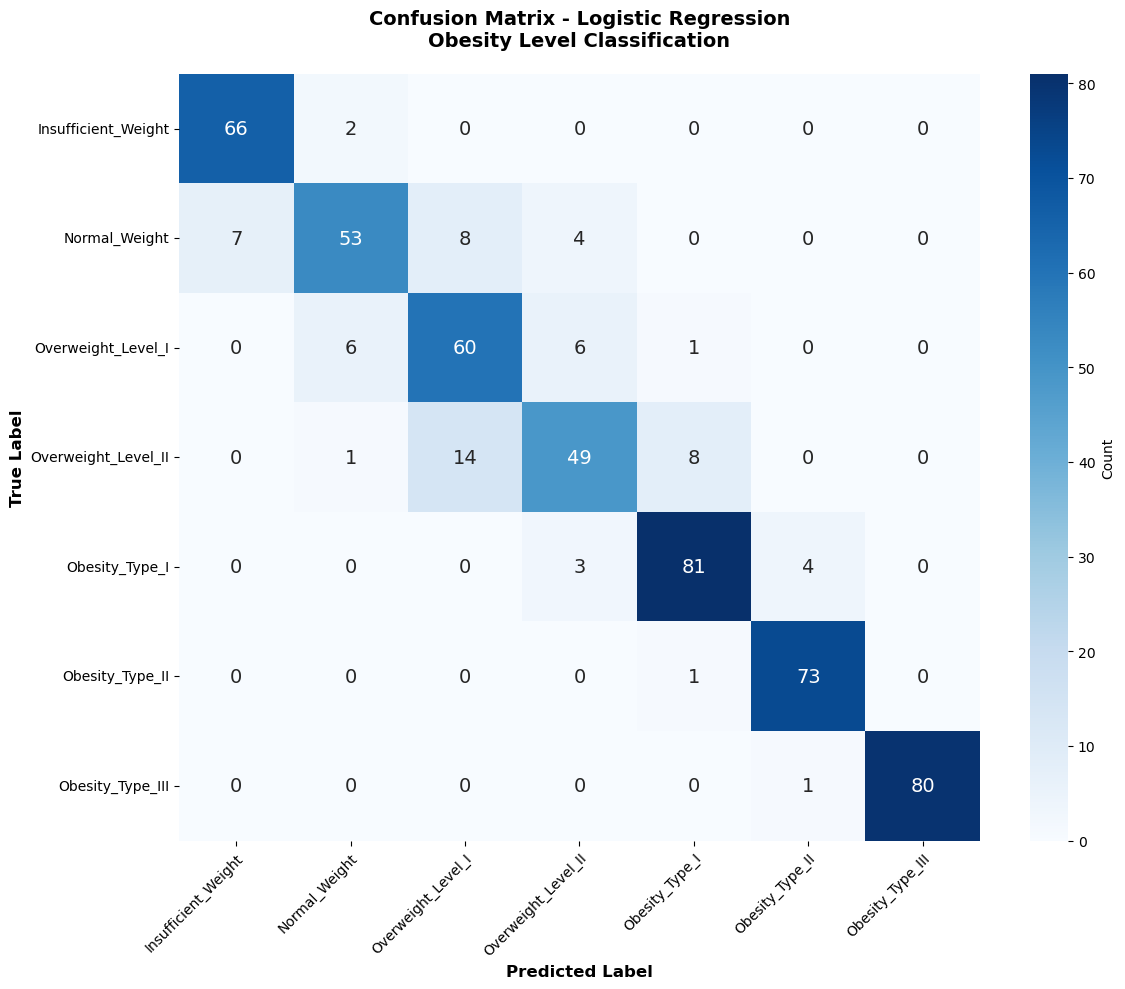

In [85]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create visualisation
fig, ax = plt.subplots(figsize=(12, 10))

# Plot heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    annot_kws={'size': 14},
    cbar_kws={'label': 'Count'},
    ax=ax
)

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Logistic Regression\n'
             'Obesity Level Classification',
             fontsize=14, fontweight='bold', pad=20)   # move the title up a bit

# Rotate labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

That's pretty good. Only 6 classifications more than 1 class away for what it should be. It looks like generally it's the normal and overweight classifications that bring in most of the error. The obese classifications seem to be fairly good.

### Decision Tree Classifier

Considering the background of this dataset, a decsion tree classifier may work well.

This time we don't need to use scaled data

#### Initial tree training

In [86]:
# decision tree classifier
dt_clf = DecisionTreeClassifier(
    random_state=13,   # unlucky for some
    criterion='gini',   # gini impurity for splits
    max_depth=None,   # mo depth limit initially
    min_samples_split=2,
    min_samples_leaf=1
)

# Train the model
dt_clf.fit(X_train_enc, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",13
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [87]:
# Model info
print(f"Tree depth: {dt_clf.get_depth()}")
print(f"Number of leaves: {dt_clf.get_n_leaves()}")
print(f"Number of features used: {(dt_clf.feature_importances_ > 0).sum()} / {len(X_train_enc.columns)}")   # which if the 19 features were used

Tree depth: 13
Number of leaves: 108
Number of features used: 15 / 19


That's quite deep and ALOT of leaves. Probably overfitting

#### Initial tree testing / performance

In [88]:
# Make predictions
y_train_pred_dt = dt_clf.predict(X_train_enc)
y_test_pred_dt = dt_clf.predict(X_test_enc)

# Calculate accuracy scores
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

In [89]:
print(f"Training Accuracy: {train_accuracy_dt*100:.2f}%")
print(f"Test Accuracy: {test_accuracy_dt*100:.2f}%")
print(f"Difference: {abs(train_accuracy_dt - test_accuracy_dt)*100:.3f}%")

Training Accuracy: 100.00%
Test Accuracy: 92.42%
Difference: 7.576%


100% training accuracy is the definition of overfitting. 7.6% drop to testing accuracy isn't great either.

Overall still better than logistic regression though

In [90]:
print(classification_report(y_test, y_test_pred_dt, target_names=target_names, digits=3))

                     precision    recall  f1-score   support

Insufficient_Weight      0.913     0.926     0.920        68
      Normal_Weight      0.857     0.750     0.800        72
 Overweight_Level_I      0.805     0.904     0.852        73
Overweight_Level_II      0.917     0.917     0.917        72
     Obesity_Type_I      0.988     0.966     0.977        88
    Obesity_Type_II      0.974     1.000     0.987        74
   Obesity_Type_III      1.000     0.988     0.994        81

           accuracy                          0.924       528
          macro avg      0.922     0.922     0.921       528
       weighted avg      0.925     0.924     0.924       528



#### Plot confusion matrix for decision tree

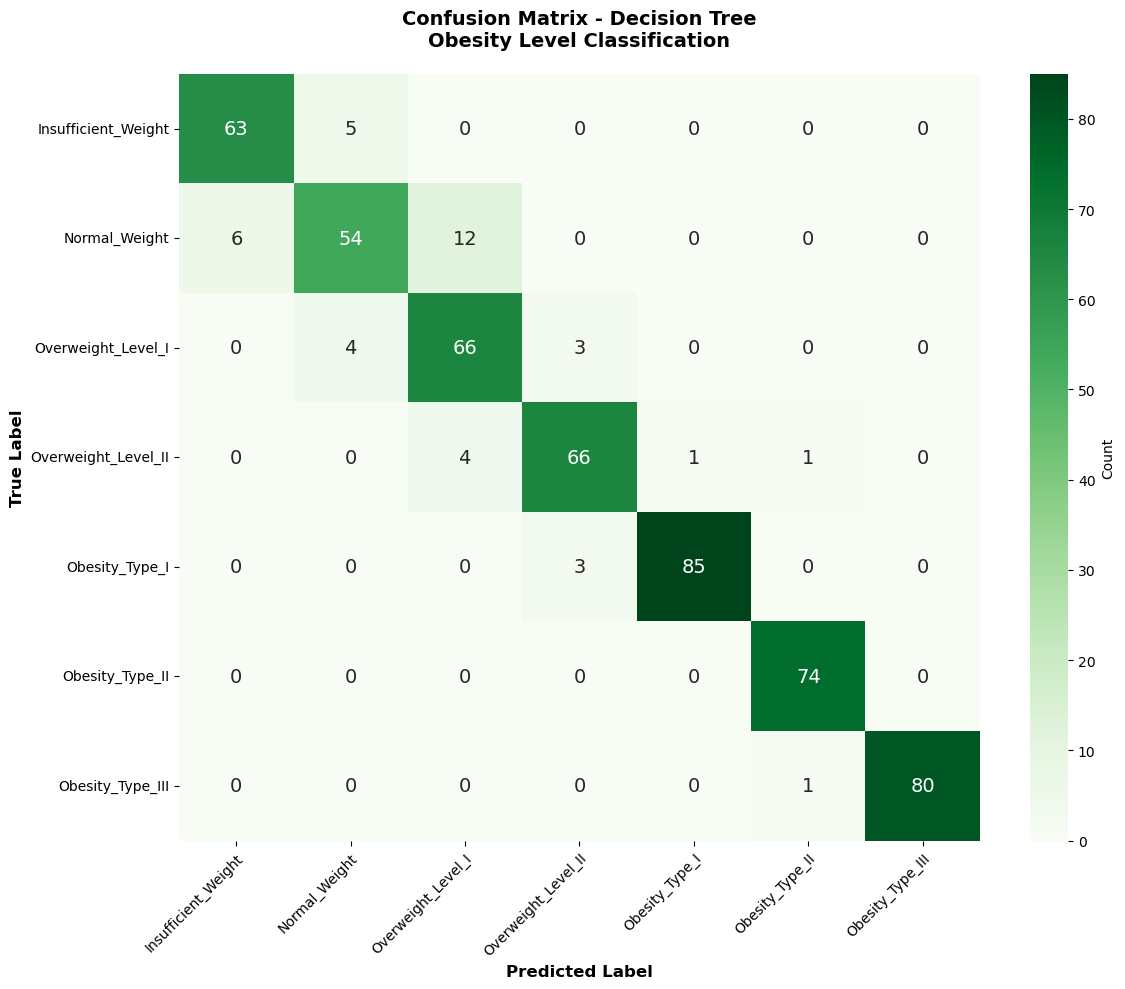

In [91]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap='Greens',   # logic reg was blue, now we do green!
    xticklabels=target_names,
    yticklabels=target_names,
    annot_kws={'size': 14},
    cbar_kws={'label': 'Count'},
    ax=ax
)

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Decision Tree\n'
             'Obesity Level Classification',
             fontsize=14, fontweight='bold', pad=20)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

Same area where most of the errors as logistic regression, but a big improvement.

#### Plot feature importance

A big advantage of decision trees is that you can see what features governed most in the classifications

In [92]:
# Get feature importance into dataframe
feature_importance = pd.DataFrame({
    'feature': X_train_enc.columns,
    'importance': dt_clf.feature_importances_
}).sort_values('importance', ascending=False)

In [93]:
feature_importance

,feature,importance
2,Weight,0.441259
1,Height,0.230204
14,Gender_Male,0.156566
0,Age,0.054159
13,CALC,0.023138
4,FAVC,0.022671
5,FCVC,0.015967
12,TUE,0.013001
7,CAEC,0.012894
6,NCP,0.012061


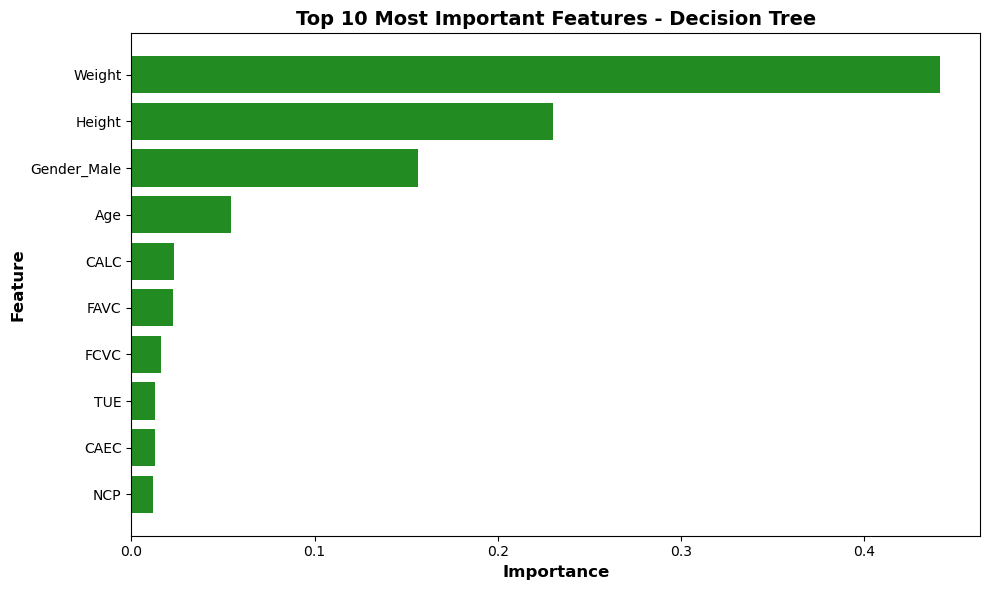

In [94]:
# plot top 10 features
top_features = feature_importance.head(10)
plt.figure(figsize=(10, 6))

plt.barh(range(len(top_features)), top_features['importance'], color='forestgreen')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Important Features - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

Weight (44%) and Height (23%) dominate, followed by Gender (16%). Aligns with EDA findings.


curious observations:

- Physical activity (FAF) has almost zero importance (0.07%) - is it diet more than physical activity?
- Family history really low (0.26%) despite 0.51 correlation in EDA
- SCC and most transport modes completely unused by the tree. Other transport (walking) very low.

#### Try a "pruned" tree?

In [95]:
# Train a pruned decision tree with constraints
dt_pruned = DecisionTreeClassifier(
    random_state=13,
    criterion='gini',
    max_depth=8, # Limit tree depth
    min_samples_split=10, # Require more samples to split
    min_samples_leaf=5  # Require more samples in leaves
)

In [96]:
dt_pruned.fit(X_train_enc, y_train)

print(f"\nPruned tree depth: {dt_pruned.get_depth()} (was 13)")
print(f"Number of leaves: {dt_pruned.get_n_leaves()} (was 108)")


Pruned tree depth: 8 (was 13)
Number of leaves: 61 (was 108)


Pruned tree hit the constraints. Lets see what the metrics show

In [97]:
# Evaluate pruned model
y_train_pred_pruned = dt_pruned.predict(X_train_enc)
y_test_pred_pruned = dt_pruned.predict(X_test_enc)

train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

In [98]:
print(f"Pruned model performance:")
print(f"   Training Accuracy: {train_acc_pruned*100:.2f}%")
print(f"   Test Accuracy: {test_acc_pruned*100:.2f}%")
print(f"   Difference: {(train_acc_pruned - test_acc_pruned)*100:.3f}%")

# Compare it to unconstrained tree
print("\n")
print(f"Comparison:")
print(f"   Unpruned test acc: {test_accuracy_dt:.4f}")
print(f"   Pruned test acc: {test_acc_pruned:.4f}")
print(f"   Difference: {(test_acc_pruned - test_accuracy_dt)*100:.3f}%")

Pruned model performance:
   Training Accuracy: 95.26%
   Test Accuracy: 90.53%
   Difference: 4.732%


Comparison:
   Unpruned test acc: 0.9242
   Pruned test acc: 0.9053
   Difference: -1.894%


Prunning helps with overfitting but drops test accuracy

What about random forrest?

### Random Forrest

Now for the king of ensemble. RANDOM FORREST!!

#### Set up and train random forrest

In [99]:
# Initialise Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    random_state=13,   # unlucky for some
    max_depth=None,   # Let trees grow
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',   # sqrt(n_features) for each split
    n_jobs=-1   # Use all cores (please don't break)
)

In [100]:
rf_clf.fit(X_train_enc, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

#### Testing / Performance

In [101]:
# Make predictions
y_train_pred_rf = rf_clf.predict(X_train_enc)
y_test_pred_rf = rf_clf.predict(X_test_enc)

In [102]:
# Evaluate
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

Check performance metrics

In [103]:
print(f"Training Accuracy: {train_acc_rf*100:.2f}%")
print(f"Test Accuracy: {test_acc_rf*100:.2f}%")
print(f"Difference: {abs(train_acc_rf - test_acc_rf)*100:.3f}%")

Training Accuracy: 100.00%
Test Accuracy: 94.70%
Difference: 5.303%


Still overfitting present. But testing accuracy has imporved again.

#### Random Forrest Metrics

In [104]:
print(classification_report(y_test, y_test_pred_rf, target_names=target_names, digits=3))

                     precision    recall  f1-score   support

Insufficient_Weight      1.000     0.971     0.985        68
      Normal_Weight      0.829     0.944     0.883        72
 Overweight_Level_I      0.926     0.863     0.894        73
Overweight_Level_II      0.889     0.889     0.889        72
     Obesity_Type_I      0.988     0.966     0.977        88
    Obesity_Type_II      1.000     1.000     1.000        74
   Obesity_Type_III      1.000     0.988     0.994        81

           accuracy                          0.947       528
          macro avg      0.948     0.946     0.946       528
       weighted avg      0.949     0.947     0.947       528



#### Plot RF confusion matrix

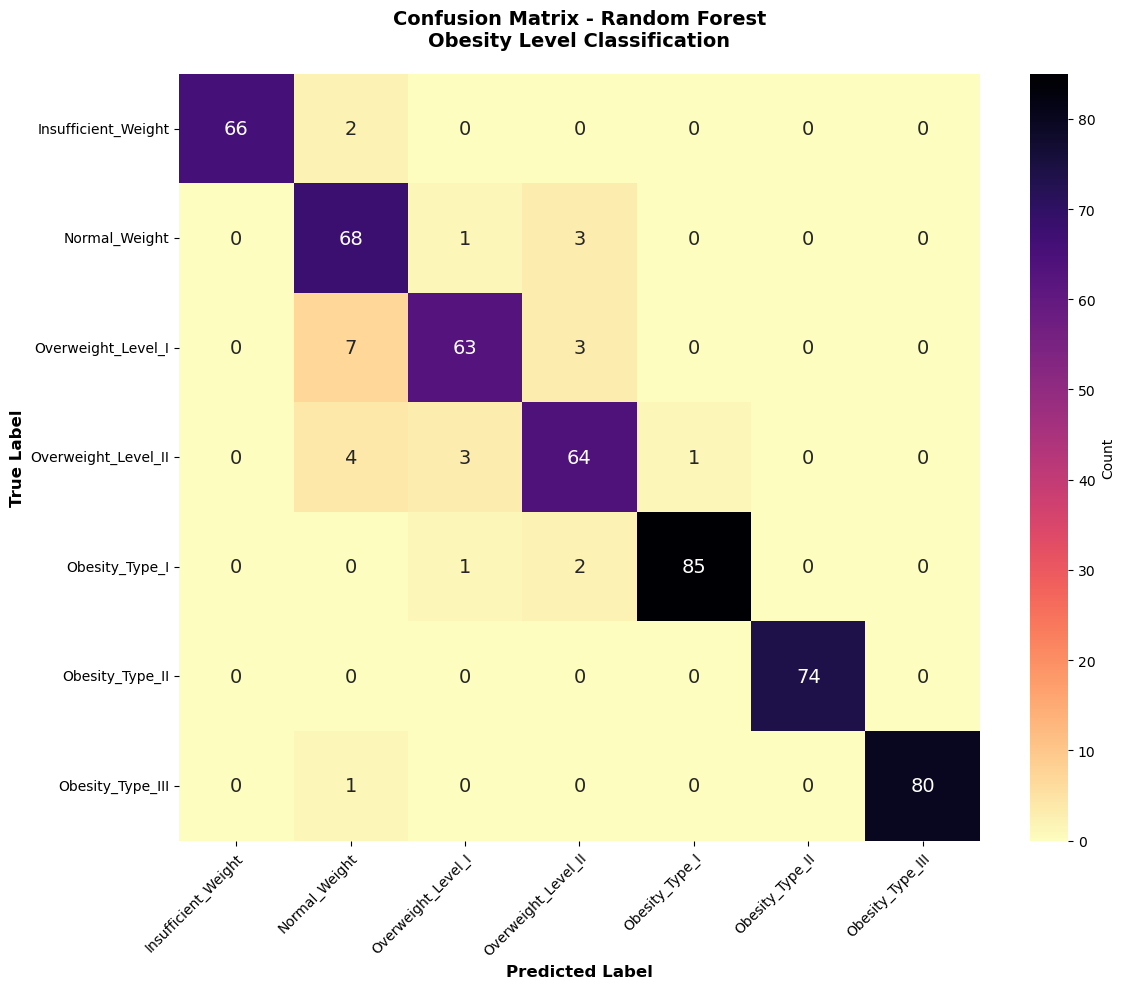

In [105]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='magma_r',   # MAGMA!!! but reverse it
    xticklabels=target_names,
    yticklabels=target_names,
    annot_kws={'size': 14},
    cbar_kws={'label': 'Count'},
    ax=ax
)

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Random Forest\n'
             'Obesity Level Classification',
             fontsize=14, fontweight='bold', pad=20)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

Again, some issues at the same area. But again, improvements

#### RF feature importance

In [106]:
# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X_train_enc.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

Check the dataframe features

In [107]:
feature_importance_rf

,feature,importance
2,Weight,0.319997
0,Age,0.098700
1,Height,0.097580
5,FCVC,0.092725
14,Gender_Male,0.056283
12,TUE,0.052052
6,NCP,0.050017
9,CH2O,0.046457
11,FAF,0.043786
7,CAEC,0.037101


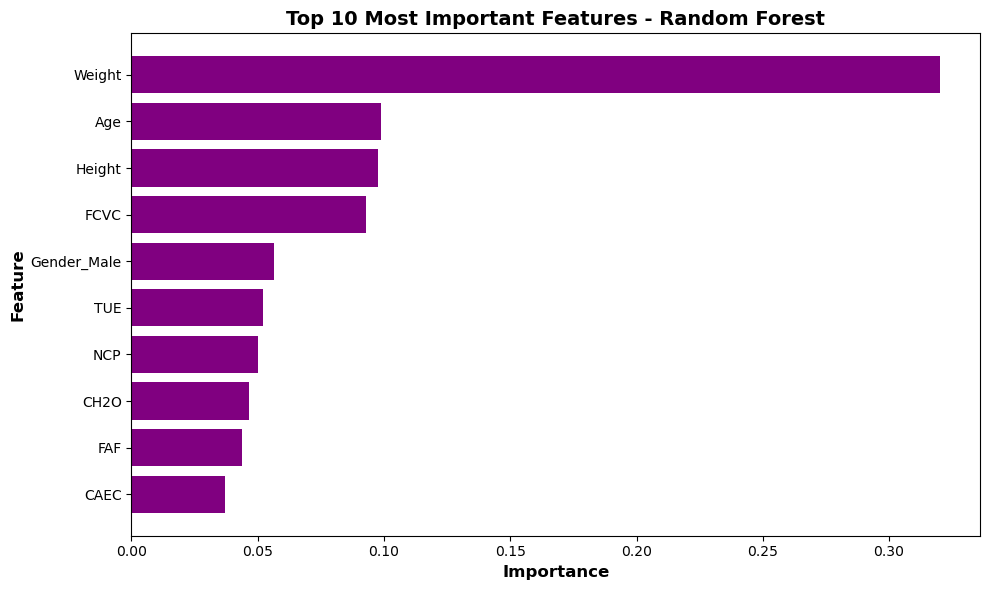

In [108]:
# Visualise top 10 features
top_features_rf = feature_importance_rf.head(10)

plt.figure(figsize=(10, 6))

plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color='purple')
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Random Forest: Weight (32%), Age (10%), Height (10%), FCVC (9%)


Random Forest spreads importance more evenly and ranks Age and FCVC much higher. This makes sense. RF averages across many trees, so it's more robust. Every single feature was used.

### Cross Validate 3 models - Logistic Regression, Decision Tree, and Random Forrest

We can cross validate all the models to ensure that our results aren't just training test split luck.

In [109]:
from sklearn.model_selection import cross_val_score

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

#### Logistic Regression

In [110]:
cv_scores_lr = cross_val_score(log_reg, X_train_scaled, y_train, cv=cv, scoring='accuracy')

In [111]:
print(f"Fold scores: {[f'{s:.4f}' for s in cv_scores_lr]}")
print(f"Mean CV Accuracy: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std():.4f})")

Fold scores: ['0.8896', '0.8580', '0.8580', '0.8703', '0.8734']
Mean CV Accuracy: 0.8699 (±0.0117)


#### Decision Tree

In [112]:
cv_scores_dt = cross_val_score(dt_clf, X_train_enc, y_train, cv=cv, scoring='accuracy')

In [113]:
print(f"Fold scores: {[f'{s:.4f}' for s in cv_scores_dt]}")
print(f"Mean CV Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std():.4f})")

Fold scores: ['0.9306', '0.8896', '0.9180', '0.9082', '0.8987']
Mean CV Accuracy: 0.9090 (±0.0144)


#### Random Forrest

In [114]:
cv_scores_rf = cross_val_score(rf_clf, X_train_enc, y_train, cv=cv, scoring='accuracy')
print(f"Fold scores: {[f'{s:.4f}' for s in cv_scores_rf]}")
print(f"Mean CV Accuracy: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std():.4f})")

Fold scores: ['0.9495', '0.9243', '0.9401', '0.9430', '0.9399']
Mean CV Accuracy: 0.9394 (±0.0083)


These all have really consistent scores and tight sds.

#### Model comparisons in dataframe

In [115]:
# Get weighted and macro f1 scores
weighted_f1_lr = f1_score(y_test, y_test_pred, average='weighted')
macro_f1_lr = f1_score(y_test, y_test_pred, average='macro')

weighted_f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted')
macro_f1_dt = f1_score(y_test, y_test_pred_dt, average='macro')

weighted_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')
macro_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')

In [116]:
comparison_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Acc': [f'{train_accuracy:.4f}', f'{train_accuracy_dt:.4f}', f'{train_acc_rf:.4f}'],
    'Test Acc': [f'{test_accuracy:.4f}', f'{test_accuracy_dt:.4f}', f'{test_acc_rf:.4f}'],
    'CV Mean': [f'{cv_scores_lr.mean():.4f}', f'{cv_scores_dt.mean():.4f}', f'{cv_scores_rf.mean():.4f}'],
    'CV Std': [f'{cv_scores_lr.std():.4f}', f'{cv_scores_dt.std():.4f}', f'{cv_scores_rf.std():.4f}'],
    'Weighted F1': [f'{weighted_f1_lr:.4f}', f'{weighted_f1_dt:.4f}', f'{weighted_f1_rf:.4f}'],
    'Macro F1': [f'{macro_f1_lr:.4f}', f'{macro_f1_dt:.4f}', f'{macro_f1_rf:.4f}'],
    'Overfitting': ['2.3%', '7.6%', '5.3%']
}

comparison_df = pd.DataFrame(comparison_data)

In [117]:
comparison_df

,Model,Train Acc,Test Acc,CV Mean,CV Std,Weighted F1,Macro F1,Overfitting
0,Logistic Regression,0.8983,0.8750,0.8699,0.0117,0.8731,0.8703,2.3%
1,Decision Tree,1.0000,0.9242,0.9090,0.0144,0.9239,0.9208,7.6%
2,Random Forest,1.0000,0.9470,0.9394,0.0083,0.9475,0.9459,5.3%


CONCLUSIONS


- Random Forest is the best performing model (94.70% test accuracy)
- RF shows excellent stability (CV std = 0.83%)
- All models generalise well (CV ≈ test accuracy)
- Tree-based models outperform linear model (logistic regression), although LR still performs well
- Ensemble method reduces overfitting compared to single decision tree